In [1]:
from Funcs.Utility import *

In [2]:
LABELS_PROC = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'labels_1h_esmsyn.csv'), index_col=['pcode','timestamp'],parse_dates=True)
PARTICIPANTS = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'UserInfo.csv'),index_col = 'pcode')

In [3]:
p = os.path.join(PATH_INTERMEDIATE, 'stress_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [4]:
X

,PIF#participationStartTimestamp,PIF#age,PIF#openness,PIF#conscientiousness,PIF#neuroticism,PIF#extraversion,PIF#agreeableness,PIF#GHQ12,PIF#PSS10,PIF#CESD-R,...,PWR#RLV_SUP_TodayAfternoon,PWR#ETP#_TodayLateAfternoon,PWR#ASC#_TodayLateAfternoon,PWR#RLV_SUP_TodayLateAfternoon,PWR#ETP#_TodayEvening,PWR#ASC#_TodayEvening,PWR#RLV_SUP_TodayEvening,PWR#ETP#_TodayNight,PWR#ASC#_TodayNight,PWR#RLV_SUP_TodayNight
0,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21615,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21616,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21617,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [6]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [17]:
cn = X.columns.tolist()
print(cn)

['PIF#participationStartTimestamp', 'Time#DOW=MON', 'Time#DOW=TUE', 'Time#DOW=WED', 'Time#DOW=THU', 'Time#DOW=FRI', 'Time#DOW=SAT', 'Time#DOW=SUN', 'Time#WKD=Y', 'Time#WKD=N', 'Time#HRN=DAWN', 'Time#HRN=MORNING', 'Time#HRN=AFTERNOON', 'Time#HRN=LATE_AFTERNOON', 'Time#HRN=EVENING', 'Time#HRN=NIGHT', 'Time#HRN=MIDNIGHT', 'APP_CAT#DSC', 'APP_CAT#DSC=UNKNOWNSYSTEMENTERSOCIALHEALTHWORKINFO', 'BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'CALL_CNT#DSC', 'CALL_CNT#DSC=UNKNOWNMOBILEOTHERWORKHOMEUNDEFINEDMAIN', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'RING#DSC', 'RING#DSC=VIBRATESILENTNORMAL', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'BT_BondState#DSC', 'BT_BondState#DSC=NONEBONDEDBONDING', 'BT_DeviceType#DSC', 'BT_DeviceType#DSC=LECLASSICUNDEFINEDDUAL', 'BT_classType#DSC', 'BT_classType#DSC=UNDEFINEDPHONE_SMARTWEARABLE_WRIST_WATCHCOMPU

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone

normalize =True
# Feature selection method
selector = SelectFromModel(
        estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=seed, max_iter=4000),
        threshold=0.005
#         estimator=LinearSVC(
#         penalty='l1',
#         loss='squared_hinge',
#         dual=False,
#         tol=1e-3,
#         C=1e-2,
#         max_iter=5000,
#         random_state=RANDOM_STATE
#     )  
    )
select = [clone(selector)]
oversample = True

In [8]:
import os
import pandas as pd
import numpy as np
import ray
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTENC, SMOTE
from tqdm import tqdm
from sklearn.model_selection import StratifiedGroupKFold, GroupKFold, KFold, TimeSeriesSplit, LeavePGroupsOut, train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder



def get_cv_splits(cv_strategy, data, labels, groups=None):
    """
    Returns the train-test splits based on the chosen cross-validation strategy.
    """
    if cv_strategy == 'loso':
        cv = LeaveOneGroupOut()
        return cv.split(data, labels, groups)
    elif cv_strategy == 'group_k_fold':
        cv = GroupKFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data, labels, groups)
    elif cv_strategy == 'k_fold':
        cv = KFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    elif cv_strategy == 'time_series':
        cv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    else:
        raise ValueError(f"Unknown CV strategy: {cv_strategy}")


def get_categorical_features_indices(df):
    return [i for i, col in enumerate(df.columns) if df[col].nunique() <= 10]

def exclude_low_variance(agg_feature, threshold=.0000001):
    agg_feature_non_zero_var = agg_feature.loc[:,agg_feature.var()>threshold]
    num_removed = agg_feature.shape[1]-agg_feature_non_zero_var.shape[1]
    print(f'{num_removed}/{agg_feature.shape[1]} features with variance < {threshold} removed')
    return agg_feature_non_zero_var

def remove_pairwise_corr(agg_feature_percent_missing, PAIRWISE_CORR_THRESHOLD=0.8, outcome_variable=None):
    if outcome_variable is not None:
        outcome_variable = pd.Series(outcome_variable, index=agg_feature_percent_missing.index, name="outcome")
        corr_with_outcome = pd.merge(outcome_variable, agg_feature_percent_missing, left_index=True, right_index=True).corr()[outcome_variable.name].abs().sort_values(ascending=False)
        importance_order = corr_with_outcome.index[1:].tolist()
        agg_feature_percent_missing = agg_feature_percent_missing[importance_order]

    Matrix = agg_feature_percent_missing.corr().abs()
    
    upper_triangle = Matrix.where(np.triu(np.ones(Matrix.shape), k=1).astype(bool))

    correlated_features = set()
    for feature in upper_triangle.columns:
        highly_correlated = upper_triangle[feature][upper_triangle[feature] > PAIRWISE_CORR_THRESHOLD].index
        correlated_features.update(highly_correlated)

    kept_features = list(set(agg_feature_percent_missing.columns) - correlated_features)
    print(f"Pairwise Corr: kept only {len(kept_features)}/{len(agg_feature_percent_missing.columns)} features")
    return agg_feature_percent_missing[kept_features]



# Feature selection method
def feature_selector(X_train, y_train):
    selector = SelectFromModel(
        estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=seed, max_iter=4000),
        threshold=0.005
#         estimator=LinearSVC(
#         penalty='l1',
#         loss='squared_hinge',
#         dual=False,
#         tol=1e-3,
#         C=1e-2,
#         max_iter=5000,
#         random_state=RANDOM_STATE
#     )
    
    )
    selector.fit(X_train, y_train)
    return selector

def split_train_test(df, labels, train_idx, test_idx):
    X_train = df.iloc[train_idx]
    y_train = labels[train_idx]
    X_test = df.iloc[test_idx]
    y_test = labels[test_idx]
    return X_train, y_train, X_test, y_test

def process_dataframe(X):
    """
    Process the input DataFrame 'X':
    1. Set column names as a range from 0 to the number of columns.
    2. Replace boolean values with 1 for True and 0 for False.

    Parameters:
        X (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The processed DataFrame.
    """
    # Set column names as a range from 0 to the number of columns
    X.columns = range(X.shape[1])

    # Replace boolean values with 1 for True and 0 for False
#     X = X * 1

    return X

def save_data_to_data_file(X, y, filename):
    if not os.path.exists(PATH_SAVE):
        os.makedirs(PATH_SAVE)

    file_path = os.path.join(PATH_SAVE, filename)

    with open(file_path, 'w') as f:
        for i in range(len(X)):
            # Check if y is a numpy array or dataframe
            label = y[i] if isinstance(y, np.ndarray) else y.iloc[i].values[0]
            
            # Start building the line with the label
            line = str(label)
            
            # Iterate through columns of X
            for col_idx, value in enumerate(X[i] if isinstance(X, np.ndarray) else X.iloc[i]):
                line += " {}:{}".format(col_idx, value)
            
            f.write(line + '\n')

In [9]:
import os
import pandas as pd
import numpy as np
import ray
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTENC, SMOTE
from tqdm import tqdm
from sklearn.model_selection import StratifiedGroupKFold, GroupKFold, KFold, TimeSeriesSplit, LeavePGroupsOut, train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder



def get_cv_splits(cv_strategy, data, labels, groups=None):
    """
    Returns the train-test splits based on the chosen cross-validation strategy.
    """
    if cv_strategy == 'loso':
        cv = LeaveOneGroupOut()
        return cv.split(data, labels, groups)
    elif cv_strategy == 'group_k_fold':
        cv = GroupKFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data, labels, groups)
    elif cv_strategy == 'k_fold':
        cv = KFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    elif cv_strategy == 'time_series':
        cv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    else:
        raise ValueError(f"Unknown CV strategy: {cv_strategy}")


def get_categorical_features_indices(df):
    return [i for i, col in enumerate(df.columns) if df[col].nunique() <= 10]

def exclude_low_variance(agg_feature, threshold=.0000001):
    agg_feature_non_zero_var = agg_feature.loc[:,agg_feature.var()>threshold]
    num_removed = agg_feature.shape[1]-agg_feature_non_zero_var.shape[1]
    print(f'{num_removed}/{agg_feature.shape[1]} features with variance < {threshold} removed')
    return agg_feature_non_zero_var

def remove_pairwise_corr(agg_feature_percent_missing, PAIRWISE_CORR_THRESHOLD=0.8, outcome_variable=None):
    if outcome_variable is not None:
        outcome_variable = pd.Series(outcome_variable, index=agg_feature_percent_missing.index, name="outcome")
        corr_with_outcome = pd.merge(outcome_variable, agg_feature_percent_missing, left_index=True, right_index=True).corr()[outcome_variable.name].abs().sort_values(ascending=False)
        importance_order = corr_with_outcome.index[1:].tolist()
        agg_feature_percent_missing = agg_feature_percent_missing[importance_order]

    Matrix = agg_feature_percent_missing.corr().abs()
    
    upper_triangle = Matrix.where(np.triu(np.ones(Matrix.shape), k=1).astype(bool))

    correlated_features = set()
    for feature in upper_triangle.columns:
        highly_correlated = upper_triangle[feature][upper_triangle[feature] > PAIRWISE_CORR_THRESHOLD].index
        correlated_features.update(highly_correlated)

    kept_features = list(set(agg_feature_percent_missing.columns) - correlated_features)
    print(f"Pairwise Corr: kept only {len(kept_features)}/{len(agg_feature_percent_missing.columns)} features")
    return agg_feature_percent_missing[kept_features]



# Feature selection method
def feature_selector(X_train, y_train):
    selector = SelectFromModel(
        estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=seed, max_iter=4000),
        threshold=0.005
#         estimator=LinearSVC(
#         penalty='l1',
#         loss='squared_hinge',
#         dual=False,
#         tol=1e-3,
#         C=1e-2,
#         max_iter=5000,
#         random_state=RANDOM_STATE
#     )
    
    )
    selector.fit(X_train, y_train)
    return selector

def split_train_test(df, labels, train_idx, test_idx):
    X_train = df.iloc[train_idx]
    y_train = labels[train_idx]
    X_test = df.iloc[test_idx]
    y_test = labels[test_idx]
    return X_train, y_train, X_test, y_test



# @ray.remote
# # def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file, C_cat, C_num, select):
# def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file):
#     X_train, y_train, X_test, y_test = split_train_test(all_data, all_labels, train_idx, test_idx)
    
# #     # Use LOSO to split the training set further into training and evaluation sets
# #     loso = LeaveOneGroupOut()
# #     train_indices, eval_indices = next(loso.split(X_train, y_train, groups=all_groups[train_idx]))    
# #     X_eval, y_eval = X_train.iloc[eval_indices], y_train[eval_indices]
# #     X_train, y_train = X_train.iloc[train_indices], y_train[train_indices]
    
#     # Split 20% of training set as eval set
#     X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

# #     # Split 20% of training set as eval set based on groups
# #     gss = GroupShuffleSplit(test_size=0.2, random_state=RANDOM_STATE)
# #     train_inds, eval_inds = next(gss.split(X_train, y_train, groups=all_groups[train_idx]))
# #     X_eval, y_eval = X_train.iloc[eval_inds], y_train[eval_inds]
# #     X_train, y_train = X_train.iloc[train_inds], y_train[train_inds]
    
#     # Apply SMOTENC
#     smote_nc = SMOTENC(categorical_features=get_categorical_features_indices(X_train), random_state=RANDOM_STATE)
#     X_train, y_train = smote_nc.fit_resample(X_train, y_train)
    
# #     #Removing low variance features
# #     X_train = exclude_low_variance(X_train)
# #     X_test = X_test[X_train.columns]  # Keep only the selected features in the test set

# #     #Removing highly correlated features
# #     X_train = remove_pairwise_corr(X_train, outcome_variable= y_train)
# #     X_test = X_test[X_train.columns]  # Keep only the selected features in the test set
    
#     # Capture indices 
#     train_indices = X_train.index
#     eval_indices = X_eval.index
#     test_indices = X_test.index
    
#     # Before feature selection, capture the columns
#     current_columns = X_train.columns
    
#     # Feature selection
#     selector = feature_selector(X_train, y_train)
#     X_train = selector.transform(X_train)
#     X_eval = selector.transform(X_eval)
#     X_test = selector.transform(X_test)

#     # Use the captured columns to get the selected columns
#     selected_columns = current_columns[selector.get_support()]
    
#     X_train = pd.DataFrame(X_train, columns=selected_columns, index=train_indices)
#     X_eval = pd.DataFrame(X_eval, columns=selected_columns, index=eval_indices)
#     X_test = pd.DataFrame(X_test, columns=selected_columns, index=test_indices)

    
#     # Process dataframes
#     X_train = process_dataframe(X_train)
#     X_eval = process_dataframe(X_eval)
#     X_test = process_dataframe(X_test)

#     subject = all_groups[test_idx[0]]

#     save_data_to_data_file(X_train, y_train, f'{subject}_train.data')
#     save_data_to_data_file(X_eval, y_eval, f'{subject}_eval.data')
#     save_data_to_data_file(X_test, y_test, f'{subject}_val.data')

@ray.remote
def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file, C_cat, C_num, select):
    X_train, y_train, X_test, y_test = split_train_test(all_data, all_labels, train_idx, test_idx)
    

#     #Leave n subject out
#     n = 4  # Number of groups to leave out
#     # Use LNGO to split the training set further into training and evaluation sets
#     lngo = LeavePGroupsOut(n_groups=n)
#     train_indices, eval_indices = next(lngo.split(X_train, y_train, groups=all_groups[train_idx]))    
#     X_eval, y_eval = X_train.iloc[eval_indices].copy(), y_train[eval_indices].copy()
#     X_train, y_train = X_train.iloc[train_indices].copy(), y_train[train_indices].copy()

    
#     # Use LOSO to split the training set further into training and evaluation sets
#     loso = LeaveOneGroupOut()
#     train_indices, eval_indices = next(loso.split(X_train, y_train, groups=all_groups[train_idx]))    
#     X_eval, y_eval = X_train.iloc[eval_indices].copy(), y_train[eval_indices].copy()
#     X_train, y_train = X_train.iloc[train_indices].copy(), y_train[train_indices].copy()


#     # Initialize the stratified group k-fold splitter
#     sgkf = StratifiedGroupKFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)
#     # Get the train and eval indices
#     train_inds, eval_inds = next(sgkf.split(X_train, y_train, groups=all_groups[train_idx]))
#     X_eval, y_eval = X_train.iloc[eval_inds], y_train[eval_inds]
#     X_train, y_train = X_train.iloc[train_inds], y_train[train_inds]

    
    # Split 20% of training set as eval set
    X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE,  stratify=y_train)

#     # Split 20% of training set as eval set based on groups
#     gss = GroupShuffleSplit(test_size=0.2, random_state=RANDOM_STATE)
#     train_inds, eval_inds = next(gss.split(X_train, y_train, groups=all_groups[train_idx]))
#     X_eval, y_eval = X_train.iloc[eval_inds], y_train[eval_inds]
#     X_train, y_train = X_train.iloc[train_inds], y_train[train_inds]

    if normalize:
        # Normalize numeric features
        scaler = StandardScaler().fit(X_train[C_num])
        X_train[C_num] = scaler.transform(X_train[C_num].copy())
        X_eval[C_num] = scaler.transform(X_eval[C_num].copy())
        X_test[C_num] = scaler.transform(X_test[C_num].copy())

    if select:
        if isinstance(select, SelectFromModel):
            select = [select]
            
        for i, s in enumerate(select):
            # Fit feature selector only on training data
            s.fit(X_train, y_train)
            selected_features = X_train.columns[s.get_support()]
            
            # Apply feature selection to train, eval, and test
            X_train = X_train[selected_features].copy()
            X_eval = X_eval[selected_features].copy()
            X_test = X_test[selected_features].copy()

    if oversample:
        # Determine categorical features for SMOTENC
        if len(C_cat):
            M = np.isin(X_train.columns, C_cat)
            sampler = SMOTENC(categorical_features=M, random_state=seed)
        else:
            sampler = SMOTE(random_state=seed)
        # Only oversample training data
        X_train, y_train = sampler.fit_resample(X_train, y_train)
    
    # Apply consistent processing to train, eval, and test dataframes
    X_train = process_dataframe(X_train)
    X_eval = process_dataframe(X_eval)
    X_test = process_dataframe(X_test)

    subject = all_groups[test_idx[0]]

    # Save processed data to files
    save_data_to_data_file(X_train, y_train, f'{subject}_train.data')
    save_data_to_data_file(X_eval, y_eval, f'{subject}_eval.data')
    save_data_to_data_file(X_test, y_test, f'{subject}_val.data')


In [10]:
# Create a full dataset and corresponding labels and groups
all_data = X
all_labels = y
all_groups = groups

In [11]:
cv_strategy = 'loso'  # Choose from: 'loso', 'group_k_fold', 'k_fold', 'time_series'

with on_ray():
    # Get the relevant train-test splits based on the chosen CV strategy
    splits = get_cv_splits(cv_strategy, all_data, all_labels, all_groups)
    
    C_cat = np.asarray(sorted(cats))
    C_num = np.asarray(sorted(X.columns[~X.columns.isin(C_cat)]))
#    Iterate over train-test splits
    futures = [process_and_save_split.remote(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file, C_cat, C_num, select) 
#    futures = [process_and_save_split.remote(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file)
                                         for train_idx, test_idx in splits]

    ray.get(futures)

2024-07-25 17:32:47,919	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
(process_and_save_split pid=2308628) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=2308628) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=2308628) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=2308628) 
(process_and_save_split pid=2308628) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(process_and_save_split pid=2308626) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning:  [repeated 16x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(process_and_save_split pid=2308626) A valu

(process_and_save_split pid=2308621) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=2308621) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=2308621) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=2308621) 
(process_and_save_split pid=2308621) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(process_and_save_split pid=2308628) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning:  [repeated 5x across cluster]
(process_and_save_split pid=2308628) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 5x across cluster]
(process_and_save_split pid=2308628) Try using .loc[row_indexer,col_indexer] = value instead [repeated 5x across cluster]
(process_and_save_split pid=2308628)  [repeated 5x across cluster]
(process_and_save_split pid=2308

(process_and_save_split pid=2308616) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=2308616) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=2308616) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=2308616) 
(process_and_save_split pid=2308616) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(process_and_save_split pid=2308624) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=2308624) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=2308624) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=2308624) 
(process_and_save_split pid=2308624) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

(process_and_save_split pid=2308625) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=2308625) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=2308625) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=2308625) 
(process_and_save_split pid=2308625) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(process_and_save_split pid=2308626) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=2308626) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=2308626) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=2308626) 
(process_and_save_split pid=2308626) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

(process_and_save_split pid=2308617) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=2308617) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=2308617) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=2308617) 
(process_and_save_split pid=2308617) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(process_and_save_split pid=2308620) /tmp/ipykernel_2308382/632661198.py:203: SettingWithCopyWarning:  [repeated 2x across cluster]
(process_and_save_split pid=2308620) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 2x across cluster]
(process_and_save_split pid=2308620) Try using .loc[row_indexer,col_indexer] = value instead [repeated 2x across cluster]
(process_and_save_split pid=2308620)  [repeated 2x across cluster]
(process_and_save_split pid=2308

Training

In [12]:
param = {
    "learning_rate": 0.01,
    "seed": RANDOM_STATE,
    "objective": 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 0,
}

In [13]:
import xgboost as xgb
import random
from sklearn.metrics import (roc_auc_score, precision_recall_fscore_support,
                             log_loss, accuracy_score, f1_score, precision_score,
                             recall_score, roc_curve, auc)
import numpy as np
import os
import pickle
import ray
import pandas as pd
from sklearn.datasets import load_svmlight_file
from xgboost import DMatrix


def mkdir(path):
    path = path.strip()
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False

def find_best_threshold(y_true, y_probs):
    best_threshold = 0
    best_f1 = 0
    thresholds = np.arange(0, 1.01, 0.01)
    for threshold in thresholds:
        y_pred = (y_probs > threshold).astype(int)
        current_f1 = f1_score(y_true, y_pred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
    return best_threshold

random.seed(seed)

folder = PATH_RESULTS
mkdir(folder)
data_folder = PATH_SAVE

final_total_auc = np.empty(0)
final_total_logloss = np.empty(0)
final_total_f1_macro = np.empty(0)
final_total_f1_pos_label = np.empty(0)
final_total_accuracy = np.empty(0)
final_total_precision = np.empty(0)
final_total_recall = np.empty(0)
train_aucs = []
test_aucs = []



# @ray.remote
def train_and_evaluate(subject, param, data_folder):

    print("start training & evaluation for {}".format(subject))


    # Convert data to DMatrix format for XGBoost
    dtrain = xgb.DMatrix(data_folder + '{}_train.data'.format(subject))
    dtest = xgb.DMatrix(data_folder + '{}_val.data'.format(subject))
    deval = xgb.DMatrix(data_folder + '{}_eval.data'.format(subject))
    

    evallist = [(dtrain, 'train'), (deval, 'eval')]

    # Train the model using standard xgboost
    bst = xgb.train(param, dtrain, evals=evallist, early_stopping_rounds=10)
    
    y_real = dtest.get_label()  # Use the labels directly
    y_score = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
#     y_score = bst.predict(dtest)
#     best_threshold = find_best_threshold(y_real, y_score)
#     y_pred = [1 if score >= best_threshold else 0 for score in y_score]
    y_pred = [1 if score >= 0.5 else 0 for score in y_score]

    all_roc_auc = roc_auc_score(y_true=y_real, y_score=y_score, average=None)
    all_logloss = log_loss(y_real, y_score)
    accuracy = accuracy_score(y_real, y_pred)

    pre, rec, f1, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='macro', zero_division=0)
    precision = pre
    recall = rec
    f1_macro = f1

    _, _, f1_pos, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='binary', zero_division=0)
    f1_pos_label = f1_pos
    print("finish training & evaluation for {}".format(subject))

#     return subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label

    ###############################
    # Compute training AUC
    y_train_real = dtrain.get_label()
    y_train_score = bst.predict(dtrain, ntree_limit=bst.best_ntree_limit)
    train_auc = roc_auc_score(y_true=y_train_real, y_score=y_train_score)
    
    test_auc = all_roc_auc

    return subject, train_auc, test_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label
 
with on_ray():
    results = [train_and_evaluate(subject, param, data_folder) for subject in set(all_groups)]
#     futures = [train_and_evaluate.remote(subject, param, data_folder) for subject in combined_similarity['pcode'].unique()]
#     results = ray.get(futures)

    for result in results:
         #Retrieving training AUC
        subject, train_auc, test_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label = result
        train_aucs.append(train_auc)
        test_aucs.append(test_auc)
        
#         subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label = result
        # Append to final metric arrays
#         final_total_auc = np.append(final_total_auc, all_roc_auc)

        final_total_logloss = np.append(final_total_logloss, all_logloss)
        final_total_accuracy = np.append(final_total_accuracy, accuracy)
        final_total_precision = np.append(final_total_precision, precision)
        final_total_recall = np.append(final_total_recall, recall)
        final_total_f1_macro = np.append(final_total_f1_macro, f1_macro)
        final_total_f1_pos_label = np.append(final_total_f1_pos_label, f1_pos_label)

    print("TOTAL All round, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(np.mean(test_aucs), np.mean(final_total_logloss), np.mean(final_total_accuracy), np.mean(final_total_precision), np.mean(final_total_recall), np.mean(final_total_f1_macro), np.mean(final_total_f1_pos_label)))

2024-07-25 17:51:47,193	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


start training & evaluation for P033
[0]	train-auc:0.64139	eval-auc:0.54309
[1]	train-auc:0.64374	eval-auc:0.54615
[2]	train-auc:0.67063	eval-auc:0.55681
[3]	train-auc:0.67679	eval-auc:0.56236
[4]	train-auc:0.68176	eval-auc:0.56253
[5]	train-auc:0.68483	eval-auc:0.56368
[6]	train-auc:0.68806	eval-auc:0.56498
[7]	train-auc:0.69027	eval-auc:0.56616
[8]	train-auc:0.69972	eval-auc:0.56967
[9]	train-auc:0.69994	eval-auc:0.56974
finish training & evaluation for P033
start training & evaluation for P022


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63384	eval-auc:0.56687
[1]	train-auc:0.64134	eval-auc:0.57517
[2]	train-auc:0.64543	eval-auc:0.57316
[3]	train-auc:0.64686	eval-auc:0.57619
[4]	train-auc:0.64713	eval-auc:0.57713
[5]	train-auc:0.64621	eval-auc:0.57769
[6]	train-auc:0.65271	eval-auc:0.57663
[7]	train-auc:0.65334	eval-auc:0.57751
[8]	train-auc:0.65689	eval-auc:0.57881
[9]	train-auc:0.66191	eval-auc:0.58072
finish training & evaluation for P022
start training & evaluation for P001


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63293	eval-auc:0.55087
[1]	train-auc:0.63295	eval-auc:0.55083
[2]	train-auc:0.67128	eval-auc:0.56357
[3]	train-auc:0.67271	eval-auc:0.56630
[4]	train-auc:0.68207	eval-auc:0.56899
[5]	train-auc:0.68568	eval-auc:0.57277
[6]	train-auc:0.70177	eval-auc:0.57705
[7]	train-auc:0.70439	eval-auc:0.57661
[8]	train-auc:0.70426	eval-auc:0.57865
[9]	train-auc:0.70516	eval-auc:0.57890
finish training & evaluation for P001
start training & evaluation for P056


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63161	eval-auc:0.55809
[1]	train-auc:0.63297	eval-auc:0.55756
[2]	train-auc:0.63319	eval-auc:0.55773
[3]	train-auc:0.63912	eval-auc:0.55262
[4]	train-auc:0.64041	eval-auc:0.54953
[5]	train-auc:0.64161	eval-auc:0.55069
[6]	train-auc:0.64506	eval-auc:0.54986
[7]	train-auc:0.64555	eval-auc:0.55140
[8]	train-auc:0.66371	eval-auc:0.56186
[9]	train-auc:0.66286	eval-auc:0.56004
finish training & evaluation for P056
start training & evaluation for P088


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64562	eval-auc:0.56267
[1]	train-auc:0.64703	eval-auc:0.56423
[2]	train-auc:0.64680	eval-auc:0.56335
[3]	train-auc:0.64741	eval-auc:0.56476
[4]	train-auc:0.65059	eval-auc:0.56636
[5]	train-auc:0.65488	eval-auc:0.56682
[6]	train-auc:0.65588	eval-auc:0.56798
[7]	train-auc:0.66224	eval-auc:0.57048
[8]	train-auc:0.66761	eval-auc:0.57305
[9]	train-auc:0.67101	eval-auc:0.57422
finish training & evaluation for P088
start training & evaluation for P135


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63911	eval-auc:0.56077
[1]	train-auc:0.64117	eval-auc:0.56410
[2]	train-auc:0.64153	eval-auc:0.56431
[3]	train-auc:0.64228	eval-auc:0.56494
[4]	train-auc:0.64505	eval-auc:0.56606
[5]	train-auc:0.64617	eval-auc:0.56642
[6]	train-auc:0.64786	eval-auc:0.56720
[7]	train-auc:0.64804	eval-auc:0.56820
[8]	train-auc:0.64791	eval-auc:0.56867
[9]	train-auc:0.64944	eval-auc:0.56735
finish training & evaluation for P135
start training & evaluation for P067


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64023	eval-auc:0.56056
[1]	train-auc:0.64138	eval-auc:0.56094
[2]	train-auc:0.65420	eval-auc:0.56779
[3]	train-auc:0.67823	eval-auc:0.57528
[4]	train-auc:0.67565	eval-auc:0.57260
[5]	train-auc:0.68449	eval-auc:0.57650
[6]	train-auc:0.68832	eval-auc:0.57849
[7]	train-auc:0.68740	eval-auc:0.57774
[8]	train-auc:0.68994	eval-auc:0.57778
[9]	train-auc:0.69324	eval-auc:0.57913
finish training & evaluation for P067
start training & evaluation for P064


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63742	eval-auc:0.55777
[1]	train-auc:0.63959	eval-auc:0.56237
[2]	train-auc:0.67809	eval-auc:0.57552
[3]	train-auc:0.67542	eval-auc:0.57508
[4]	train-auc:0.68317	eval-auc:0.57929
[5]	train-auc:0.69168	eval-auc:0.58050
[6]	train-auc:0.69457	eval-auc:0.57992
[7]	train-auc:0.69781	eval-auc:0.58269
[8]	train-auc:0.70396	eval-auc:0.58456
[9]	train-auc:0.70577	eval-auc:0.58275
finish training & evaluation for P064
start training & evaluation for P075


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64997	eval-auc:0.55902
[1]	train-auc:0.65314	eval-auc:0.55916
[2]	train-auc:0.65916	eval-auc:0.56012
[3]	train-auc:0.65843	eval-auc:0.56057
[4]	train-auc:0.66315	eval-auc:0.56092
[5]	train-auc:0.66870	eval-auc:0.56605
[6]	train-auc:0.66927	eval-auc:0.56574
[7]	train-auc:0.67050	eval-auc:0.56376
[8]	train-auc:0.67364	eval-auc:0.56272
[9]	train-auc:0.67723	eval-auc:0.56606
finish training & evaluation for P075
start training & evaluation for P126


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64129	eval-auc:0.56334
[1]	train-auc:0.64298	eval-auc:0.56360
[2]	train-auc:0.64458	eval-auc:0.56410
[3]	train-auc:0.64758	eval-auc:0.56774
[4]	train-auc:0.65138	eval-auc:0.57039
[5]	train-auc:0.67199	eval-auc:0.57829
[6]	train-auc:0.67294	eval-auc:0.57852
[7]	train-auc:0.68199	eval-auc:0.58100
[8]	train-auc:0.68181	eval-auc:0.58169
[9]	train-auc:0.68755	eval-auc:0.58527
finish training & evaluation for P126
start training & evaluation for P118


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64598	eval-auc:0.56344
[1]	train-auc:0.64877	eval-auc:0.56097
[2]	train-auc:0.65334	eval-auc:0.56515
[3]	train-auc:0.65260	eval-auc:0.56447
[4]	train-auc:0.66044	eval-auc:0.56547
[5]	train-auc:0.66251	eval-auc:0.56543
[6]	train-auc:0.66545	eval-auc:0.56680
[7]	train-auc:0.66645	eval-auc:0.56778
[8]	train-auc:0.66915	eval-auc:0.57035
[9]	train-auc:0.68020	eval-auc:0.57472
finish training & evaluation for P118
start training & evaluation for P038


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64031	eval-auc:0.55538
[1]	train-auc:0.64389	eval-auc:0.55511
[2]	train-auc:0.64706	eval-auc:0.55496
[3]	train-auc:0.65701	eval-auc:0.55844
[4]	train-auc:0.68260	eval-auc:0.56866
[5]	train-auc:0.68116	eval-auc:0.56946
[6]	train-auc:0.68283	eval-auc:0.57122
[7]	train-auc:0.69255	eval-auc:0.57514
[8]	train-auc:0.69120	eval-auc:0.57467
[9]	train-auc:0.69554	eval-auc:0.57683
finish training & evaluation for P038
start training & evaluation for P079


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64202	eval-auc:0.56271
[1]	train-auc:0.64287	eval-auc:0.56222
[2]	train-auc:0.64419	eval-auc:0.56293
[3]	train-auc:0.64440	eval-auc:0.56243
[4]	train-auc:0.64459	eval-auc:0.56311
[5]	train-auc:0.64460	eval-auc:0.56312
[6]	train-auc:0.64491	eval-auc:0.56328
[7]	train-auc:0.64505	eval-auc:0.56400
[8]	train-auc:0.64622	eval-auc:0.56476
[9]	train-auc:0.65955	eval-auc:0.56912
finish training & evaluation for P079
start training & evaluation for P043


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64561	eval-auc:0.54718
[1]	train-auc:0.64600	eval-auc:0.54743
[2]	train-auc:0.65117	eval-auc:0.55111
[3]	train-auc:0.66058	eval-auc:0.54885
[4]	train-auc:0.66950	eval-auc:0.55029
[5]	train-auc:0.67025	eval-auc:0.55136
[6]	train-auc:0.67184	eval-auc:0.55218
[7]	train-auc:0.67905	eval-auc:0.55262
[8]	train-auc:0.67982	eval-auc:0.55381
[9]	train-auc:0.68473	eval-auc:0.55432
finish training & evaluation for P043
start training & evaluation for P083


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64982	eval-auc:0.55382
[1]	train-auc:0.65254	eval-auc:0.55343
[2]	train-auc:0.66076	eval-auc:0.55649
[3]	train-auc:0.66148	eval-auc:0.55651
[4]	train-auc:0.66955	eval-auc:0.56195
[5]	train-auc:0.67055	eval-auc:0.56368
[6]	train-auc:0.67221	eval-auc:0.56425
[7]	train-auc:0.67334	eval-auc:0.56574
[8]	train-auc:0.67579	eval-auc:0.56700
[9]	train-auc:0.67712	eval-auc:0.56805
finish training & evaluation for P083
start training & evaluation for P020


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62889	eval-auc:0.54814
[1]	train-auc:0.62980	eval-auc:0.54975
[2]	train-auc:0.63585	eval-auc:0.55400
[3]	train-auc:0.65416	eval-auc:0.55855
[4]	train-auc:0.65520	eval-auc:0.55875
[5]	train-auc:0.66071	eval-auc:0.56043
[6]	train-auc:0.65861	eval-auc:0.56147
[7]	train-auc:0.66684	eval-auc:0.56229
[8]	train-auc:0.67252	eval-auc:0.56395
[9]	train-auc:0.67564	eval-auc:0.56422
finish training & evaluation for P020
start training & evaluation for P021


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64184	eval-auc:0.56655
[1]	train-auc:0.64534	eval-auc:0.56570
[2]	train-auc:0.65519	eval-auc:0.56826
[3]	train-auc:0.65474	eval-auc:0.56758
[4]	train-auc:0.65696	eval-auc:0.56865
[5]	train-auc:0.65986	eval-auc:0.56927
[6]	train-auc:0.66102	eval-auc:0.57122
[7]	train-auc:0.66212	eval-auc:0.57058
[8]	train-auc:0.66788	eval-auc:0.57249
[9]	train-auc:0.67886	eval-auc:0.57707
finish training & evaluation for P021
start training & evaluation for P011


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64153	eval-auc:0.54154
[1]	train-auc:0.64445	eval-auc:0.55062
[2]	train-auc:0.64199	eval-auc:0.54968
[3]	train-auc:0.64166	eval-auc:0.54862
[4]	train-auc:0.64567	eval-auc:0.54966
[5]	train-auc:0.64491	eval-auc:0.55004
[6]	train-auc:0.64790	eval-auc:0.54978
[7]	train-auc:0.64933	eval-auc:0.55092
[8]	train-auc:0.66309	eval-auc:0.55880
[9]	train-auc:0.66966	eval-auc:0.56005
finish training & evaluation for P011
start training & evaluation for P048


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64530	eval-auc:0.56104
[1]	train-auc:0.64825	eval-auc:0.56128
[2]	train-auc:0.67435	eval-auc:0.57083
[3]	train-auc:0.67142	eval-auc:0.57008
[4]	train-auc:0.68231	eval-auc:0.57678
[5]	train-auc:0.68567	eval-auc:0.57545
[6]	train-auc:0.68410	eval-auc:0.57578
[7]	train-auc:0.68586	eval-auc:0.57512
[8]	train-auc:0.68590	eval-auc:0.57609
[9]	train-auc:0.68689	eval-auc:0.57654
finish training & evaluation for P048
start training & evaluation for P110


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.65131	eval-auc:0.56983
[1]	train-auc:0.65212	eval-auc:0.56936
[2]	train-auc:0.65539	eval-auc:0.56763
[3]	train-auc:0.65501	eval-auc:0.56879
[4]	train-auc:0.67506	eval-auc:0.57515
[5]	train-auc:0.67352	eval-auc:0.57399
[6]	train-auc:0.67249	eval-auc:0.57499
[7]	train-auc:0.67136	eval-auc:0.57366
[8]	train-auc:0.67881	eval-auc:0.57556
[9]	train-auc:0.68020	eval-auc:0.57623
finish training & evaluation for P110
start training & evaluation for P127


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.65302	eval-auc:0.56817
[1]	train-auc:0.66126	eval-auc:0.56939
[2]	train-auc:0.66503	eval-auc:0.57208
[3]	train-auc:0.66510	eval-auc:0.57111
[4]	train-auc:0.66812	eval-auc:0.57229
[5]	train-auc:0.68749	eval-auc:0.57915
[6]	train-auc:0.69611	eval-auc:0.58188
[7]	train-auc:0.70226	eval-auc:0.58368
[8]	train-auc:0.70627	eval-auc:0.58503
[9]	train-auc:0.71042	eval-auc:0.58758
finish training & evaluation for P127
start training & evaluation for P025


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62871	eval-auc:0.55956
[1]	train-auc:0.63025	eval-auc:0.56125
[2]	train-auc:0.67005	eval-auc:0.57545
[3]	train-auc:0.66861	eval-auc:0.57454
[4]	train-auc:0.67589	eval-auc:0.57712
[5]	train-auc:0.67398	eval-auc:0.57680
[6]	train-auc:0.67798	eval-auc:0.57884
[7]	train-auc:0.67649	eval-auc:0.57835
[8]	train-auc:0.68464	eval-auc:0.58599
[9]	train-auc:0.68378	eval-auc:0.58528
finish training & evaluation for P025
start training & evaluation for P104


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63538	eval-auc:0.55435
[1]	train-auc:0.64856	eval-auc:0.56198
[2]	train-auc:0.65138	eval-auc:0.56042
[3]	train-auc:0.65267	eval-auc:0.56186
[4]	train-auc:0.65598	eval-auc:0.56562
[5]	train-auc:0.66399	eval-auc:0.56399
[6]	train-auc:0.68065	eval-auc:0.57208
[7]	train-auc:0.68205	eval-auc:0.57405
[8]	train-auc:0.69065	eval-auc:0.57716
[9]	train-auc:0.69504	eval-auc:0.57947
finish training & evaluation for P104
start training & evaluation for P095


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64929	eval-auc:0.56900
[1]	train-auc:0.65015	eval-auc:0.57000
[2]	train-auc:0.65207	eval-auc:0.57169
[3]	train-auc:0.66221	eval-auc:0.57477
[4]	train-auc:0.66351	eval-auc:0.57409
[5]	train-auc:0.66696	eval-auc:0.57711
[6]	train-auc:0.66723	eval-auc:0.57606
[7]	train-auc:0.66934	eval-auc:0.57667
[8]	train-auc:0.67058	eval-auc:0.57593
[9]	train-auc:0.67446	eval-auc:0.57895
finish training & evaluation for P095
start training & evaluation for P120


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63592	eval-auc:0.56671
[1]	train-auc:0.63843	eval-auc:0.56902
[2]	train-auc:0.64021	eval-auc:0.56950
[3]	train-auc:0.63976	eval-auc:0.56871
[4]	train-auc:0.64368	eval-auc:0.56784
[5]	train-auc:0.64346	eval-auc:0.56808
[6]	train-auc:0.64507	eval-auc:0.56746
[7]	train-auc:0.66128	eval-auc:0.57159
[8]	train-auc:0.66100	eval-auc:0.57477
[9]	train-auc:0.66961	eval-auc:0.57489
finish training & evaluation for P120
start training & evaluation for P027


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64587	eval-auc:0.55765
[1]	train-auc:0.65747	eval-auc:0.56077
[2]	train-auc:0.65796	eval-auc:0.56146
[3]	train-auc:0.65936	eval-auc:0.56298
[4]	train-auc:0.65956	eval-auc:0.56152
[5]	train-auc:0.66143	eval-auc:0.56417
[6]	train-auc:0.66295	eval-auc:0.56613
[7]	train-auc:0.66614	eval-auc:0.56865
[8]	train-auc:0.66759	eval-auc:0.57018
[9]	train-auc:0.66847	eval-auc:0.57092
finish training & evaluation for P027
start training & evaluation for P065


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63997	eval-auc:0.56596
[1]	train-auc:0.64179	eval-auc:0.56620
[2]	train-auc:0.64323	eval-auc:0.56966
[3]	train-auc:0.67119	eval-auc:0.57594
[4]	train-auc:0.67821	eval-auc:0.57516
[5]	train-auc:0.67918	eval-auc:0.57712
[6]	train-auc:0.68183	eval-auc:0.57614
[7]	train-auc:0.68277	eval-auc:0.57611
[8]	train-auc:0.69479	eval-auc:0.57777
[9]	train-auc:0.69350	eval-auc:0.57747
finish training & evaluation for P065
start training & evaluation for P102


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64395	eval-auc:0.55061
[1]	train-auc:0.64406	eval-auc:0.55107
[2]	train-auc:0.64443	eval-auc:0.55302
[3]	train-auc:0.64481	eval-auc:0.55278
[4]	train-auc:0.64495	eval-auc:0.55337
[5]	train-auc:0.64683	eval-auc:0.55282
[6]	train-auc:0.65218	eval-auc:0.55749
[7]	train-auc:0.65391	eval-auc:0.55686
[8]	train-auc:0.65677	eval-auc:0.55772
[9]	train-auc:0.66999	eval-auc:0.56810
finish training & evaluation for P102
start training & evaluation for P019


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64236	eval-auc:0.53750
[1]	train-auc:0.64235	eval-auc:0.53804
[2]	train-auc:0.64614	eval-auc:0.53746
[3]	train-auc:0.64713	eval-auc:0.53992
[4]	train-auc:0.64861	eval-auc:0.53980
[5]	train-auc:0.64909	eval-auc:0.54298
[6]	train-auc:0.65495	eval-auc:0.54559
[7]	train-auc:0.66407	eval-auc:0.55292
[8]	train-auc:0.66678	eval-auc:0.55471
[9]	train-auc:0.67711	eval-auc:0.55564
finish training & evaluation for P019
start training & evaluation for P117


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64621	eval-auc:0.55869
[1]	train-auc:0.65026	eval-auc:0.56082
[2]	train-auc:0.67164	eval-auc:0.56585
[3]	train-auc:0.67337	eval-auc:0.56513
[4]	train-auc:0.68096	eval-auc:0.56891
[5]	train-auc:0.68371	eval-auc:0.56866
[6]	train-auc:0.68580	eval-auc:0.56899
[7]	train-auc:0.68652	eval-auc:0.56988
[8]	train-auc:0.68944	eval-auc:0.56967
[9]	train-auc:0.69133	eval-auc:0.57083
finish training & evaluation for P117
start training & evaluation for P133


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64185	eval-auc:0.56595
[1]	train-auc:0.64537	eval-auc:0.56621
[2]	train-auc:0.64801	eval-auc:0.56945
[3]	train-auc:0.67155	eval-auc:0.57867
[4]	train-auc:0.66892	eval-auc:0.57741
[5]	train-auc:0.66773	eval-auc:0.57699
[6]	train-auc:0.67835	eval-auc:0.58150
[7]	train-auc:0.68111	eval-auc:0.58004
[8]	train-auc:0.68390	eval-auc:0.57864
[9]	train-auc:0.68253	eval-auc:0.57844
finish training & evaluation for P133
start training & evaluation for P115


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64006	eval-auc:0.55988
[1]	train-auc:0.64197	eval-auc:0.56093
[2]	train-auc:0.64830	eval-auc:0.56431
[3]	train-auc:0.64747	eval-auc:0.56352
[4]	train-auc:0.65023	eval-auc:0.56689
[5]	train-auc:0.65074	eval-auc:0.56584
[6]	train-auc:0.65153	eval-auc:0.56674
[7]	train-auc:0.65095	eval-auc:0.56717
[8]	train-auc:0.65188	eval-auc:0.56827
[9]	train-auc:0.65343	eval-auc:0.56895
finish training & evaluation for P115
start training & evaluation for P028


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64094	eval-auc:0.56174
[1]	train-auc:0.65552	eval-auc:0.56672
[2]	train-auc:0.65552	eval-auc:0.56721
[3]	train-auc:0.65607	eval-auc:0.56689
[4]	train-auc:0.66510	eval-auc:0.57015
[5]	train-auc:0.67387	eval-auc:0.57366
[6]	train-auc:0.67652	eval-auc:0.57636
[7]	train-auc:0.68228	eval-auc:0.57804
[8]	train-auc:0.68515	eval-auc:0.57728
[9]	train-auc:0.69456	eval-auc:0.58322
finish training & evaluation for P028
start training & evaluation for P074


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63905	eval-auc:0.55127
[1]	train-auc:0.64544	eval-auc:0.55709
[2]	train-auc:0.64483	eval-auc:0.55678
[3]	train-auc:0.64913	eval-auc:0.55694
[4]	train-auc:0.65663	eval-auc:0.55797
[5]	train-auc:0.65753	eval-auc:0.55826
[6]	train-auc:0.65988	eval-auc:0.55969
[7]	train-auc:0.66104	eval-auc:0.55923
[8]	train-auc:0.66069	eval-auc:0.55999
[9]	train-auc:0.66306	eval-auc:0.56023
finish training & evaluation for P074
start training & evaluation for P050


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63987	eval-auc:0.55616
[1]	train-auc:0.65251	eval-auc:0.56736
[2]	train-auc:0.65280	eval-auc:0.56772
[3]	train-auc:0.65125	eval-auc:0.56645
[4]	train-auc:0.65862	eval-auc:0.56673
[5]	train-auc:0.65739	eval-auc:0.56521
[6]	train-auc:0.66047	eval-auc:0.56461
[7]	train-auc:0.66374	eval-auc:0.56535
[8]	train-auc:0.66831	eval-auc:0.57102
[9]	train-auc:0.66916	eval-auc:0.57088
finish training & evaluation for P050
start training & evaluation for P041


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63670	eval-auc:0.56005
[1]	train-auc:0.63689	eval-auc:0.56023
[2]	train-auc:0.64229	eval-auc:0.56131
[3]	train-auc:0.64498	eval-auc:0.56274
[4]	train-auc:0.64501	eval-auc:0.56332
[5]	train-auc:0.64629	eval-auc:0.56175
[6]	train-auc:0.64952	eval-auc:0.56460
[7]	train-auc:0.65089	eval-auc:0.56430
[8]	train-auc:0.65290	eval-auc:0.56421
[9]	train-auc:0.65289	eval-auc:0.56391
finish training & evaluation for P041
start training & evaluation for P047


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62896	eval-auc:0.56253
[1]	train-auc:0.64813	eval-auc:0.57135
[2]	train-auc:0.64929	eval-auc:0.57192
[3]	train-auc:0.66180	eval-auc:0.57530
[4]	train-auc:0.66317	eval-auc:0.57975
[5]	train-auc:0.66986	eval-auc:0.58192
[6]	train-auc:0.66944	eval-auc:0.58169
[7]	train-auc:0.67147	eval-auc:0.58390
[8]	train-auc:0.67036	eval-auc:0.58312
[9]	train-auc:0.67573	eval-auc:0.58471
finish training & evaluation for P047
start training & evaluation for P058


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63774	eval-auc:0.54572
[1]	train-auc:0.64040	eval-auc:0.54541
[2]	train-auc:0.64166	eval-auc:0.54496
[3]	train-auc:0.64588	eval-auc:0.55283
[4]	train-auc:0.67640	eval-auc:0.56365
[5]	train-auc:0.67512	eval-auc:0.56361
[6]	train-auc:0.68591	eval-auc:0.56782
[7]	train-auc:0.69272	eval-auc:0.57418
[8]	train-auc:0.69153	eval-auc:0.57363
[9]	train-auc:0.69422	eval-auc:0.57555
finish training & evaluation for P058
start training & evaluation for P061


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63547	eval-auc:0.54323
[1]	train-auc:0.63608	eval-auc:0.54277
[2]	train-auc:0.63873	eval-auc:0.54532
[3]	train-auc:0.63907	eval-auc:0.54523
[4]	train-auc:0.64104	eval-auc:0.54443
[5]	train-auc:0.64150	eval-auc:0.54436
[6]	train-auc:0.64211	eval-auc:0.54406
[7]	train-auc:0.64523	eval-auc:0.54706
[8]	train-auc:0.64808	eval-auc:0.54947
[9]	train-auc:0.64865	eval-auc:0.54992
finish training & evaluation for P061
start training & evaluation for P034


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63479	eval-auc:0.56802
[1]	train-auc:0.63860	eval-auc:0.56465
[2]	train-auc:0.64388	eval-auc:0.56540
[3]	train-auc:0.64314	eval-auc:0.56394
[4]	train-auc:0.64428	eval-auc:0.56681
[5]	train-auc:0.65777	eval-auc:0.57320
[6]	train-auc:0.65946	eval-auc:0.57356
[7]	train-auc:0.66458	eval-auc:0.57801
[8]	train-auc:0.66807	eval-auc:0.57940
[9]	train-auc:0.66979	eval-auc:0.58156
finish training & evaluation for P034
start training & evaluation for P076


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64181	eval-auc:0.56156
[1]	train-auc:0.64193	eval-auc:0.56153
[2]	train-auc:0.65079	eval-auc:0.56422
[3]	train-auc:0.65407	eval-auc:0.56790
[4]	train-auc:0.65389	eval-auc:0.56833
[5]	train-auc:0.65766	eval-auc:0.56982
[6]	train-auc:0.66316	eval-auc:0.57263
[7]	train-auc:0.66370	eval-auc:0.57217
[8]	train-auc:0.66641	eval-auc:0.57199
[9]	train-auc:0.66852	eval-auc:0.57061
finish training & evaluation for P076
start training & evaluation for P101


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64084	eval-auc:0.54303
[1]	train-auc:0.67728	eval-auc:0.56101
[2]	train-auc:0.67281	eval-auc:0.55850
[3]	train-auc:0.67716	eval-auc:0.56053
[4]	train-auc:0.69036	eval-auc:0.56541
[5]	train-auc:0.68979	eval-auc:0.56812
[6]	train-auc:0.69378	eval-auc:0.56904
[7]	train-auc:0.69795	eval-auc:0.57264
[8]	train-auc:0.69979	eval-auc:0.57561
[9]	train-auc:0.70150	eval-auc:0.57557
finish training & evaluation for P101
start training & evaluation for P035


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64075	eval-auc:0.55641
[1]	train-auc:0.64344	eval-auc:0.55844
[2]	train-auc:0.64320	eval-auc:0.55907
[3]	train-auc:0.64760	eval-auc:0.56165
[4]	train-auc:0.64983	eval-auc:0.56040
[5]	train-auc:0.65230	eval-auc:0.56238
[6]	train-auc:0.67284	eval-auc:0.56453
[7]	train-auc:0.67449	eval-auc:0.56327
[8]	train-auc:0.68378	eval-auc:0.56439
[9]	train-auc:0.68517	eval-auc:0.56578
finish training & evaluation for P035
start training & evaluation for P008


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.65005	eval-auc:0.56338
[1]	train-auc:0.65233	eval-auc:0.56361
[2]	train-auc:0.65953	eval-auc:0.56843
[3]	train-auc:0.66765	eval-auc:0.57260
[4]	train-auc:0.66735	eval-auc:0.57314
[5]	train-auc:0.67335	eval-auc:0.57462
[6]	train-auc:0.67384	eval-auc:0.57418
[7]	train-auc:0.67584	eval-auc:0.57531
[8]	train-auc:0.67633	eval-auc:0.57234
[9]	train-auc:0.67727	eval-auc:0.57378
finish training & evaluation for P008
start training & evaluation for P049


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63816	eval-auc:0.55772
[1]	train-auc:0.63931	eval-auc:0.56014
[2]	train-auc:0.63896	eval-auc:0.55956
[3]	train-auc:0.64443	eval-auc:0.56000
[4]	train-auc:0.64445	eval-auc:0.56108
[5]	train-auc:0.64783	eval-auc:0.56191
[6]	train-auc:0.67003	eval-auc:0.56860
[7]	train-auc:0.67005	eval-auc:0.56845
[8]	train-auc:0.67056	eval-auc:0.56719
[9]	train-auc:0.68156	eval-auc:0.57000
finish training & evaluation for P049
start training & evaluation for P098


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64439	eval-auc:0.55836
[1]	train-auc:0.65551	eval-auc:0.56674
[2]	train-auc:0.65463	eval-auc:0.56538
[3]	train-auc:0.66256	eval-auc:0.56829
[4]	train-auc:0.66568	eval-auc:0.57217
[5]	train-auc:0.66850	eval-auc:0.57329
[6]	train-auc:0.66904	eval-auc:0.57379
[7]	train-auc:0.67631	eval-auc:0.57484
[8]	train-auc:0.67602	eval-auc:0.57603
[9]	train-auc:0.68061	eval-auc:0.57666
finish training & evaluation for P098
start training & evaluation for P046


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63121	eval-auc:0.54420
[1]	train-auc:0.63506	eval-auc:0.54837
[2]	train-auc:0.63548	eval-auc:0.54898
[3]	train-auc:0.64537	eval-auc:0.55515
[4]	train-auc:0.67194	eval-auc:0.56518
[5]	train-auc:0.67299	eval-auc:0.56549
[6]	train-auc:0.68080	eval-auc:0.57050
[7]	train-auc:0.67996	eval-auc:0.57077
[8]	train-auc:0.68370	eval-auc:0.57280
[9]	train-auc:0.68925	eval-auc:0.57546
finish training & evaluation for P046
start training & evaluation for P045


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63577	eval-auc:0.55553
[1]	train-auc:0.63637	eval-auc:0.55564
[2]	train-auc:0.63622	eval-auc:0.55571
[3]	train-auc:0.64144	eval-auc:0.55815
[4]	train-auc:0.64336	eval-auc:0.55764
[5]	train-auc:0.65241	eval-auc:0.56160
[6]	train-auc:0.65268	eval-auc:0.56071
[7]	train-auc:0.66965	eval-auc:0.56625
[8]	train-auc:0.67084	eval-auc:0.56802
[9]	train-auc:0.67971	eval-auc:0.57008
finish training & evaluation for P045
start training & evaluation for P073


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63888	eval-auc:0.55328
[1]	train-auc:0.64100	eval-auc:0.55358
[2]	train-auc:0.65127	eval-auc:0.55752
[3]	train-auc:0.65118	eval-auc:0.55584
[4]	train-auc:0.65369	eval-auc:0.55490
[5]	train-auc:0.65187	eval-auc:0.55431
[6]	train-auc:0.65775	eval-auc:0.55712
[7]	train-auc:0.67206	eval-auc:0.56253
[8]	train-auc:0.67250	eval-auc:0.56101
[9]	train-auc:0.67945	eval-auc:0.56349
finish training & evaluation for P073
start training & evaluation for P084


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63948	eval-auc:0.55239
[1]	train-auc:0.64121	eval-auc:0.55265
[2]	train-auc:0.64508	eval-auc:0.55390
[3]	train-auc:0.65255	eval-auc:0.55807
[4]	train-auc:0.65254	eval-auc:0.55730
[5]	train-auc:0.65584	eval-auc:0.55852
[6]	train-auc:0.65842	eval-auc:0.56135
[7]	train-auc:0.65973	eval-auc:0.56103
[8]	train-auc:0.66024	eval-auc:0.56069
[9]	train-auc:0.66515	eval-auc:0.56443
finish training & evaluation for P084
start training & evaluation for P002


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64923	eval-auc:0.55261
[1]	train-auc:0.66024	eval-auc:0.55867
[2]	train-auc:0.65998	eval-auc:0.55969
[3]	train-auc:0.65986	eval-auc:0.55939
[4]	train-auc:0.65857	eval-auc:0.55965
[5]	train-auc:0.66034	eval-auc:0.55962
[6]	train-auc:0.66237	eval-auc:0.56232
[7]	train-auc:0.66413	eval-auc:0.56278
[8]	train-auc:0.66431	eval-auc:0.56383
[9]	train-auc:0.66644	eval-auc:0.56367
finish training & evaluation for P002
start training & evaluation for P109


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63758	eval-auc:0.56235
[1]	train-auc:0.63758	eval-auc:0.56235
[2]	train-auc:0.64400	eval-auc:0.56393
[3]	train-auc:0.64532	eval-auc:0.56530
[4]	train-auc:0.64530	eval-auc:0.56549
[5]	train-auc:0.64549	eval-auc:0.56697
[6]	train-auc:0.64591	eval-auc:0.56668
[7]	train-auc:0.64667	eval-auc:0.56767
[8]	train-auc:0.65771	eval-auc:0.57066
[9]	train-auc:0.65665	eval-auc:0.56944
finish training & evaluation for P109
start training & evaluation for P124


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63982	eval-auc:0.54990
[1]	train-auc:0.64179	eval-auc:0.55117
[2]	train-auc:0.64898	eval-auc:0.55076
[3]	train-auc:0.65070	eval-auc:0.55217
[4]	train-auc:0.65931	eval-auc:0.55927
[5]	train-auc:0.66143	eval-auc:0.55684
[6]	train-auc:0.66374	eval-auc:0.55824
[7]	train-auc:0.66627	eval-auc:0.55944
[8]	train-auc:0.66768	eval-auc:0.56109
[9]	train-auc:0.66893	eval-auc:0.56006
finish training & evaluation for P124
start training & evaluation for P094


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64433	eval-auc:0.55777
[1]	train-auc:0.67235	eval-auc:0.56534
[2]	train-auc:0.67397	eval-auc:0.56595
[3]	train-auc:0.67522	eval-auc:0.56845
[4]	train-auc:0.67262	eval-auc:0.56769
[5]	train-auc:0.67315	eval-auc:0.56763
[6]	train-auc:0.67183	eval-auc:0.56813
[7]	train-auc:0.67204	eval-auc:0.56808
[8]	train-auc:0.67205	eval-auc:0.56876
[9]	train-auc:0.67266	eval-auc:0.56846
finish training & evaluation for P094
start training & evaluation for P121


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64584	eval-auc:0.55332
[1]	train-auc:0.67626	eval-auc:0.57268
[2]	train-auc:0.67221	eval-auc:0.57759
[3]	train-auc:0.68262	eval-auc:0.57709
[4]	train-auc:0.68054	eval-auc:0.57910
[5]	train-auc:0.67738	eval-auc:0.57891
[6]	train-auc:0.67499	eval-auc:0.57819
[7]	train-auc:0.68058	eval-auc:0.57784
[8]	train-auc:0.68185	eval-auc:0.57917
[9]	train-auc:0.67979	eval-auc:0.57955
finish training & evaluation for P121
start training & evaluation for P107


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64276	eval-auc:0.56420
[1]	train-auc:0.64366	eval-auc:0.56394
[2]	train-auc:0.66550	eval-auc:0.56763
[3]	train-auc:0.66316	eval-auc:0.56725
[4]	train-auc:0.66840	eval-auc:0.56991
[5]	train-auc:0.67340	eval-auc:0.57092
[6]	train-auc:0.67468	eval-auc:0.57049
[7]	train-auc:0.67903	eval-auc:0.57282
[8]	train-auc:0.68006	eval-auc:0.57261
[9]	train-auc:0.68657	eval-auc:0.57632
finish training & evaluation for P107
start training & evaluation for P078


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64191	eval-auc:0.56841
[1]	train-auc:0.66250	eval-auc:0.56937
[2]	train-auc:0.66023	eval-auc:0.56717
[3]	train-auc:0.66519	eval-auc:0.56898
[4]	train-auc:0.67100	eval-auc:0.57247
[5]	train-auc:0.66664	eval-auc:0.56830
[6]	train-auc:0.66799	eval-auc:0.56845
[7]	train-auc:0.66624	eval-auc:0.56784
[8]	train-auc:0.66697	eval-auc:0.56801
[9]	train-auc:0.67135	eval-auc:0.56983
finish training & evaluation for P078
start training & evaluation for P069


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64465	eval-auc:0.54361
[1]	train-auc:0.67599	eval-auc:0.55863
[2]	train-auc:0.67816	eval-auc:0.56017
[3]	train-auc:0.67457	eval-auc:0.55779
[4]	train-auc:0.68152	eval-auc:0.56214
[5]	train-auc:0.68731	eval-auc:0.56424
[6]	train-auc:0.68982	eval-auc:0.56695
[7]	train-auc:0.69145	eval-auc:0.56388
[8]	train-auc:0.69084	eval-auc:0.56434
[9]	train-auc:0.69127	eval-auc:0.56406
finish training & evaluation for P069
start training & evaluation for P051


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64252	eval-auc:0.56662
[1]	train-auc:0.67503	eval-auc:0.56882
[2]	train-auc:0.67192	eval-auc:0.56876
[3]	train-auc:0.69672	eval-auc:0.58042
[4]	train-auc:0.69622	eval-auc:0.58118
[5]	train-auc:0.69509	eval-auc:0.57958
[6]	train-auc:0.69187	eval-auc:0.57849
[7]	train-auc:0.69955	eval-auc:0.58269
[8]	train-auc:0.70270	eval-auc:0.58473
[9]	train-auc:0.70157	eval-auc:0.58414
finish training & evaluation for P051
start training & evaluation for P057


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64049	eval-auc:0.55502
[1]	train-auc:0.67630	eval-auc:0.56937
[2]	train-auc:0.67285	eval-auc:0.56982
[3]	train-auc:0.68162	eval-auc:0.57379
[4]	train-auc:0.68234	eval-auc:0.57290
[5]	train-auc:0.68847	eval-auc:0.57249
[6]	train-auc:0.69176	eval-auc:0.57539
[7]	train-auc:0.69390	eval-auc:0.57688
[8]	train-auc:0.69425	eval-auc:0.57463
[9]	train-auc:0.69840	eval-auc:0.57653
finish training & evaluation for P057
start training & evaluation for P052


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64866	eval-auc:0.56244
[1]	train-auc:0.65226	eval-auc:0.56360
[2]	train-auc:0.68307	eval-auc:0.57142
[3]	train-auc:0.68636	eval-auc:0.56878
[4]	train-auc:0.68616	eval-auc:0.57049
[5]	train-auc:0.68711	eval-auc:0.56878
[6]	train-auc:0.68625	eval-auc:0.56659
[7]	train-auc:0.69243	eval-auc:0.56619
[8]	train-auc:0.69524	eval-auc:0.56669
[9]	train-auc:0.69353	eval-auc:0.56549
finish training & evaluation for P052
start training & evaluation for P024


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64723	eval-auc:0.56365
[1]	train-auc:0.64794	eval-auc:0.56301
[2]	train-auc:0.64977	eval-auc:0.56404
[3]	train-auc:0.65065	eval-auc:0.56520
[4]	train-auc:0.65401	eval-auc:0.56813
[5]	train-auc:0.65476	eval-auc:0.56910
[6]	train-auc:0.65512	eval-auc:0.57006
[7]	train-auc:0.65691	eval-auc:0.57181
[8]	train-auc:0.65707	eval-auc:0.57064
[9]	train-auc:0.66000	eval-auc:0.57199
finish training & evaluation for P024
start training & evaluation for P044


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63887	eval-auc:0.55170
[1]	train-auc:0.64054	eval-auc:0.55028
[2]	train-auc:0.64509	eval-auc:0.55385
[3]	train-auc:0.66994	eval-auc:0.56740
[4]	train-auc:0.66692	eval-auc:0.56619
[5]	train-auc:0.67520	eval-auc:0.57041
[6]	train-auc:0.67421	eval-auc:0.57062
[7]	train-auc:0.68103	eval-auc:0.57450
[8]	train-auc:0.68085	eval-auc:0.57261
[9]	train-auc:0.68392	eval-auc:0.57444
finish training & evaluation for P044
start training & evaluation for P087


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64569	eval-auc:0.56719
[1]	train-auc:0.66286	eval-auc:0.57068
[2]	train-auc:0.66429	eval-auc:0.57384
[3]	train-auc:0.66514	eval-auc:0.57372
[4]	train-auc:0.66512	eval-auc:0.57506
[5]	train-auc:0.66992	eval-auc:0.57610
[6]	train-auc:0.66942	eval-auc:0.57617
[7]	train-auc:0.67135	eval-auc:0.57626
[8]	train-auc:0.67121	eval-auc:0.57634
[9]	train-auc:0.67315	eval-auc:0.57841
finish training & evaluation for P087
start training & evaluation for P013


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63238	eval-auc:0.55433
[1]	train-auc:0.63574	eval-auc:0.55769
[2]	train-auc:0.65007	eval-auc:0.56088
[3]	train-auc:0.64828	eval-auc:0.56261
[4]	train-auc:0.66563	eval-auc:0.56836
[5]	train-auc:0.66475	eval-auc:0.56595
[6]	train-auc:0.66584	eval-auc:0.56941
[7]	train-auc:0.66560	eval-auc:0.56815
[8]	train-auc:0.66885	eval-auc:0.56932
[9]	train-auc:0.66885	eval-auc:0.56843
finish training & evaluation for P013
start training & evaluation for P072


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.65053	eval-auc:0.57085
[1]	train-auc:0.65921	eval-auc:0.57436
[2]	train-auc:0.66126	eval-auc:0.57689
[3]	train-auc:0.66301	eval-auc:0.57606
[4]	train-auc:0.66544	eval-auc:0.57661
[5]	train-auc:0.66945	eval-auc:0.57957
[6]	train-auc:0.67322	eval-auc:0.58057
[7]	train-auc:0.67688	eval-auc:0.57954
[8]	train-auc:0.67823	eval-auc:0.58093
[9]	train-auc:0.68024	eval-auc:0.58088
finish training & evaluation for P072
start training & evaluation for P003


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64331	eval-auc:0.55009
[1]	train-auc:0.64888	eval-auc:0.55400
[2]	train-auc:0.65198	eval-auc:0.56096
[3]	train-auc:0.65196	eval-auc:0.56156
[4]	train-auc:0.65278	eval-auc:0.56235
[5]	train-auc:0.65690	eval-auc:0.56253
[6]	train-auc:0.65716	eval-auc:0.56377
[7]	train-auc:0.65827	eval-auc:0.56435
[8]	train-auc:0.66506	eval-auc:0.56676
[9]	train-auc:0.66699	eval-auc:0.56873
finish training & evaluation for P003
start training & evaluation for P014


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64792	eval-auc:0.55852
[1]	train-auc:0.65720	eval-auc:0.56066
[2]	train-auc:0.65707	eval-auc:0.56018
[3]	train-auc:0.65807	eval-auc:0.56064
[4]	train-auc:0.66193	eval-auc:0.56204
[5]	train-auc:0.66213	eval-auc:0.56186
[6]	train-auc:0.66655	eval-auc:0.56321
[7]	train-auc:0.67041	eval-auc:0.56406
[8]	train-auc:0.68557	eval-auc:0.56888
[9]	train-auc:0.68590	eval-auc:0.56798
finish training & evaluation for P014
start training & evaluation for P054


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64357	eval-auc:0.55590
[1]	train-auc:0.64680	eval-auc:0.55948
[2]	train-auc:0.65063	eval-auc:0.56480
[3]	train-auc:0.66860	eval-auc:0.56788
[4]	train-auc:0.68254	eval-auc:0.56965
[5]	train-auc:0.68675	eval-auc:0.56987
[6]	train-auc:0.68824	eval-auc:0.57136
[7]	train-auc:0.69014	eval-auc:0.56963
[8]	train-auc:0.69130	eval-auc:0.57089
[9]	train-auc:0.69153	eval-auc:0.57163
finish training & evaluation for P054
start training & evaluation for P007


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63394	eval-auc:0.54463
[1]	train-auc:0.63457	eval-auc:0.54519
[2]	train-auc:0.64120	eval-auc:0.55447
[3]	train-auc:0.64433	eval-auc:0.55764
[4]	train-auc:0.64692	eval-auc:0.56263
[5]	train-auc:0.65613	eval-auc:0.56446
[6]	train-auc:0.66150	eval-auc:0.56966
[7]	train-auc:0.66267	eval-auc:0.56897
[8]	train-auc:0.66431	eval-auc:0.57099
[9]	train-auc:0.66529	eval-auc:0.57043
finish training & evaluation for P007
start training & evaluation for P055


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64003	eval-auc:0.56668
[1]	train-auc:0.64035	eval-auc:0.56729
[2]	train-auc:0.64281	eval-auc:0.56675
[3]	train-auc:0.64832	eval-auc:0.57102
[4]	train-auc:0.65149	eval-auc:0.57205
[5]	train-auc:0.65383	eval-auc:0.57344
[6]	train-auc:0.65534	eval-auc:0.57543
[7]	train-auc:0.65554	eval-auc:0.57484
[8]	train-auc:0.65704	eval-auc:0.57537
[9]	train-auc:0.66932	eval-auc:0.58157
finish training & evaluation for P055
start training & evaluation for P123


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63942	eval-auc:0.56156
[1]	train-auc:0.64160	eval-auc:0.56472
[2]	train-auc:0.64515	eval-auc:0.56625
[3]	train-auc:0.66964	eval-auc:0.57045
[4]	train-auc:0.66588	eval-auc:0.56945
[5]	train-auc:0.67770	eval-auc:0.57270
[6]	train-auc:0.68481	eval-auc:0.57532
[7]	train-auc:0.68770	eval-auc:0.57815
[8]	train-auc:0.69003	eval-auc:0.57909
[9]	train-auc:0.69076	eval-auc:0.57875
finish training & evaluation for P123
start training & evaluation for P105


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64055	eval-auc:0.55672
[1]	train-auc:0.64069	eval-auc:0.55857
[2]	train-auc:0.64498	eval-auc:0.55769
[3]	train-auc:0.64616	eval-auc:0.55771
[4]	train-auc:0.65512	eval-auc:0.55988
[5]	train-auc:0.65871	eval-auc:0.56235
[6]	train-auc:0.66134	eval-auc:0.56268
[7]	train-auc:0.66118	eval-auc:0.56304
[8]	train-auc:0.67285	eval-auc:0.56572
[9]	train-auc:0.67479	eval-auc:0.56788
finish training & evaluation for P105
start training & evaluation for P015


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.65175	eval-auc:0.57163
[1]	train-auc:0.65558	eval-auc:0.57220
[2]	train-auc:0.66837	eval-auc:0.57915
[3]	train-auc:0.68852	eval-auc:0.58562
[4]	train-auc:0.68753	eval-auc:0.58617
[5]	train-auc:0.69311	eval-auc:0.58674
[6]	train-auc:0.69394	eval-auc:0.58658
[7]	train-auc:0.69663	eval-auc:0.58814
[8]	train-auc:0.69766	eval-auc:0.58970
[9]	train-auc:0.69934	eval-auc:0.58864
finish training & evaluation for P015
start training & evaluation for P086


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64202	eval-auc:0.54889
[1]	train-auc:0.64313	eval-auc:0.54858
[2]	train-auc:0.65061	eval-auc:0.55405
[3]	train-auc:0.65013	eval-auc:0.55400
[4]	train-auc:0.65252	eval-auc:0.55435
[5]	train-auc:0.65367	eval-auc:0.55626
[6]	train-auc:0.65446	eval-auc:0.55678
[7]	train-auc:0.65809	eval-auc:0.56016
[8]	train-auc:0.65927	eval-auc:0.56274
[9]	train-auc:0.66141	eval-auc:0.56422
finish training & evaluation for P086
start training & evaluation for P023


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63760	eval-auc:0.56748
[1]	train-auc:0.65917	eval-auc:0.57324
[2]	train-auc:0.65907	eval-auc:0.57613
[3]	train-auc:0.66293	eval-auc:0.57537
[4]	train-auc:0.66243	eval-auc:0.57674
[5]	train-auc:0.68413	eval-auc:0.58172
[6]	train-auc:0.68627	eval-auc:0.58339
[7]	train-auc:0.69507	eval-auc:0.58473
[8]	train-auc:0.69226	eval-auc:0.58397
[9]	train-auc:0.69714	eval-auc:0.58393
finish training & evaluation for P023
start training & evaluation for P096


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64511	eval-auc:0.54181
[1]	train-auc:0.64680	eval-auc:0.54315
[2]	train-auc:0.64971	eval-auc:0.54538
[3]	train-auc:0.65109	eval-auc:0.54676
[4]	train-auc:0.65408	eval-auc:0.54632
[5]	train-auc:0.65560	eval-auc:0.54666
[6]	train-auc:0.65760	eval-auc:0.54709
[7]	train-auc:0.65762	eval-auc:0.54784
[8]	train-auc:0.65768	eval-auc:0.54741
[9]	train-auc:0.65991	eval-auc:0.54763
finish training & evaluation for P096
start training & evaluation for P099


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63593	eval-auc:0.55204
[1]	train-auc:0.64204	eval-auc:0.55505
[2]	train-auc:0.64240	eval-auc:0.55502
[3]	train-auc:0.64485	eval-auc:0.55588
[4]	train-auc:0.64598	eval-auc:0.55565
[5]	train-auc:0.65246	eval-auc:0.55838
[6]	train-auc:0.65280	eval-auc:0.55861
[7]	train-auc:0.65759	eval-auc:0.56015
[8]	train-auc:0.66301	eval-auc:0.56200
[9]	train-auc:0.67150	eval-auc:0.56537
finish training & evaluation for P099
start training & evaluation for P037


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63683	eval-auc:0.55716
[1]	train-auc:0.65373	eval-auc:0.55968
[2]	train-auc:0.65127	eval-auc:0.55981
[3]	train-auc:0.66033	eval-auc:0.56079
[4]	train-auc:0.66526	eval-auc:0.56333
[5]	train-auc:0.66900	eval-auc:0.56362
[6]	train-auc:0.66680	eval-auc:0.56328
[7]	train-auc:0.67125	eval-auc:0.56463
[8]	train-auc:0.67479	eval-auc:0.56564
[9]	train-auc:0.67461	eval-auc:0.56573
finish training & evaluation for P037
start training & evaluation for P131


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64401	eval-auc:0.55462
[1]	train-auc:0.65601	eval-auc:0.56237
[2]	train-auc:0.65821	eval-auc:0.55938
[3]	train-auc:0.65895	eval-auc:0.55935
[4]	train-auc:0.66280	eval-auc:0.56142
[5]	train-auc:0.66698	eval-auc:0.56328
[6]	train-auc:0.67532	eval-auc:0.56872
[7]	train-auc:0.67527	eval-auc:0.56829
[8]	train-auc:0.67709	eval-auc:0.56860
[9]	train-auc:0.67942	eval-auc:0.57003
finish training & evaluation for P131
start training & evaluation for P009


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64917	eval-auc:0.55653
[1]	train-auc:0.65082	eval-auc:0.55525
[2]	train-auc:0.65713	eval-auc:0.56130
[3]	train-auc:0.65922	eval-auc:0.56010
[4]	train-auc:0.66544	eval-auc:0.56203
[5]	train-auc:0.66885	eval-auc:0.56363
[6]	train-auc:0.67324	eval-auc:0.56211
[7]	train-auc:0.67256	eval-auc:0.56422
[8]	train-auc:0.67880	eval-auc:0.56529
[9]	train-auc:0.68107	eval-auc:0.56607
finish training & evaluation for P009
start training & evaluation for P070


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63946	eval-auc:0.55317
[1]	train-auc:0.64057	eval-auc:0.55347
[2]	train-auc:0.64830	eval-auc:0.55561
[3]	train-auc:0.64886	eval-auc:0.55744
[4]	train-auc:0.65124	eval-auc:0.55712
[5]	train-auc:0.65247	eval-auc:0.55831
[6]	train-auc:0.65259	eval-auc:0.55871
[7]	train-auc:0.65541	eval-auc:0.56152
[8]	train-auc:0.65764	eval-auc:0.56362
[9]	train-auc:0.65973	eval-auc:0.56390
finish training & evaluation for P070
start training & evaluation for P040


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63643	eval-auc:0.54680
[1]	train-auc:0.64791	eval-auc:0.55002
[2]	train-auc:0.65944	eval-auc:0.55752
[3]	train-auc:0.66146	eval-auc:0.56026
[4]	train-auc:0.66862	eval-auc:0.56454
[5]	train-auc:0.66974	eval-auc:0.56511
[6]	train-auc:0.67123	eval-auc:0.56604
[7]	train-auc:0.67064	eval-auc:0.56666
[8]	train-auc:0.67702	eval-auc:0.56799
[9]	train-auc:0.67859	eval-auc:0.56895
finish training & evaluation for P040
start training & evaluation for P077


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63704	eval-auc:0.55561
[1]	train-auc:0.64000	eval-auc:0.55539
[2]	train-auc:0.65045	eval-auc:0.56064
[3]	train-auc:0.65246	eval-auc:0.56193
[4]	train-auc:0.65513	eval-auc:0.56209
[5]	train-auc:0.66699	eval-auc:0.56765
[6]	train-auc:0.67141	eval-auc:0.57001
[7]	train-auc:0.67436	eval-auc:0.57201
[8]	train-auc:0.67491	eval-auc:0.57172
[9]	train-auc:0.67645	eval-auc:0.57048
finish training & evaluation for P077
start training & evaluation for P018


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63984	eval-auc:0.56170
[1]	train-auc:0.64892	eval-auc:0.57263
[2]	train-auc:0.64812	eval-auc:0.57127
[3]	train-auc:0.64987	eval-auc:0.57160
[4]	train-auc:0.65165	eval-auc:0.57502
[5]	train-auc:0.65813	eval-auc:0.57725
[6]	train-auc:0.65890	eval-auc:0.57651
[7]	train-auc:0.67321	eval-auc:0.58144
[8]	train-auc:0.67512	eval-auc:0.58243
[9]	train-auc:0.68438	eval-auc:0.58477
finish training & evaluation for P018
start training & evaluation for P108


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63807	eval-auc:0.55507
[1]	train-auc:0.64168	eval-auc:0.55785
[2]	train-auc:0.64525	eval-auc:0.55518
[3]	train-auc:0.66299	eval-auc:0.56181
[4]	train-auc:0.66864	eval-auc:0.56354
[5]	train-auc:0.67063	eval-auc:0.56601
[6]	train-auc:0.67264	eval-auc:0.56684
[7]	train-auc:0.67221	eval-auc:0.56724
[8]	train-auc:0.67469	eval-auc:0.56855
[9]	train-auc:0.68128	eval-auc:0.56903
finish training & evaluation for P108
start training & evaluation for P030


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63552	eval-auc:0.55750
[1]	train-auc:0.64307	eval-auc:0.56081
[2]	train-auc:0.65680	eval-auc:0.56357
[3]	train-auc:0.65544	eval-auc:0.56226
[4]	train-auc:0.66058	eval-auc:0.56424
[5]	train-auc:0.66053	eval-auc:0.56387
[6]	train-auc:0.66192	eval-auc:0.56511
[7]	train-auc:0.66394	eval-auc:0.56569
[8]	train-auc:0.66409	eval-auc:0.56643
[9]	train-auc:0.67177	eval-auc:0.56719
finish training & evaluation for P030
start training & evaluation for P090


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64275	eval-auc:0.54935
[1]	train-auc:0.64980	eval-auc:0.55509
[2]	train-auc:0.65245	eval-auc:0.55508
[3]	train-auc:0.65435	eval-auc:0.55588
[4]	train-auc:0.66405	eval-auc:0.55954
[5]	train-auc:0.66983	eval-auc:0.56027
[6]	train-auc:0.67133	eval-auc:0.56201
[7]	train-auc:0.67558	eval-auc:0.56133
[8]	train-auc:0.67445	eval-auc:0.56182
[9]	train-auc:0.67633	eval-auc:0.56080
finish training & evaluation for P090
start training & evaluation for P066


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64403	eval-auc:0.56757
[1]	train-auc:0.65250	eval-auc:0.56896
[2]	train-auc:0.65274	eval-auc:0.56800
[3]	train-auc:0.65670	eval-auc:0.56678
[4]	train-auc:0.66068	eval-auc:0.56712
[5]	train-auc:0.66377	eval-auc:0.56953
[6]	train-auc:0.66413	eval-auc:0.56846
[7]	train-auc:0.66649	eval-auc:0.56896
[8]	train-auc:0.66778	eval-auc:0.56931
[9]	train-auc:0.66971	eval-auc:0.56885
finish training & evaluation for P066
start training & evaluation for P116


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64382	eval-auc:0.56395
[1]	train-auc:0.64811	eval-auc:0.56625
[2]	train-auc:0.64882	eval-auc:0.56566
[3]	train-auc:0.65165	eval-auc:0.56680
[4]	train-auc:0.65190	eval-auc:0.56653
[5]	train-auc:0.65340	eval-auc:0.56728
[6]	train-auc:0.65705	eval-auc:0.57061
[7]	train-auc:0.65686	eval-auc:0.57141
[8]	train-auc:0.65698	eval-auc:0.57215
[9]	train-auc:0.65830	eval-auc:0.57319
finish training & evaluation for P116
start training & evaluation for P016


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64371	eval-auc:0.56919
[1]	train-auc:0.64644	eval-auc:0.56673
[2]	train-auc:0.64853	eval-auc:0.56605
[3]	train-auc:0.64910	eval-auc:0.56693
[4]	train-auc:0.65636	eval-auc:0.57395
[5]	train-auc:0.66131	eval-auc:0.57770
[6]	train-auc:0.66274	eval-auc:0.57906
[7]	train-auc:0.66650	eval-auc:0.58030
[8]	train-auc:0.66672	eval-auc:0.58102
[9]	train-auc:0.67181	eval-auc:0.58320
finish training & evaluation for P016
start training & evaluation for P026


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63779	eval-auc:0.56498
[1]	train-auc:0.63872	eval-auc:0.56499
[2]	train-auc:0.65197	eval-auc:0.57348
[3]	train-auc:0.66436	eval-auc:0.57583
[4]	train-auc:0.66627	eval-auc:0.57586
[5]	train-auc:0.66648	eval-auc:0.57442
[6]	train-auc:0.66757	eval-auc:0.57634
[7]	train-auc:0.67879	eval-auc:0.57711
[8]	train-auc:0.68273	eval-auc:0.57786
[9]	train-auc:0.68813	eval-auc:0.57857
finish training & evaluation for P026
start training & evaluation for P097


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64578	eval-auc:0.55884
[1]	train-auc:0.65069	eval-auc:0.56389
[2]	train-auc:0.65032	eval-auc:0.55908
[3]	train-auc:0.65082	eval-auc:0.56422
[4]	train-auc:0.65256	eval-auc:0.56340
[5]	train-auc:0.65328	eval-auc:0.56434
[6]	train-auc:0.65271	eval-auc:0.56480
[7]	train-auc:0.65666	eval-auc:0.56638
[8]	train-auc:0.65940	eval-auc:0.56749
[9]	train-auc:0.67642	eval-auc:0.57281
finish training & evaluation for P097
start training & evaluation for P092


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64618	eval-auc:0.55616
[1]	train-auc:0.64884	eval-auc:0.55460
[2]	train-auc:0.64883	eval-auc:0.55573
[3]	train-auc:0.65044	eval-auc:0.55693
[4]	train-auc:0.65345	eval-auc:0.55567
[5]	train-auc:0.65387	eval-auc:0.55665
[6]	train-auc:0.66760	eval-auc:0.56358
[7]	train-auc:0.67354	eval-auc:0.56551
[8]	train-auc:0.67298	eval-auc:0.56562
[9]	train-auc:0.68158	eval-auc:0.56729
finish training & evaluation for P092
start training & evaluation for P071


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64548	eval-auc:0.55479
[1]	train-auc:0.64919	eval-auc:0.55713
[2]	train-auc:0.65015	eval-auc:0.55882
[3]	train-auc:0.65399	eval-auc:0.55849
[4]	train-auc:0.65406	eval-auc:0.55956
[5]	train-auc:0.65577	eval-auc:0.56001
[6]	train-auc:0.65605	eval-auc:0.56033
[7]	train-auc:0.65729	eval-auc:0.56031
[8]	train-auc:0.66064	eval-auc:0.56193
[9]	train-auc:0.66076	eval-auc:0.56204
finish training & evaluation for P071
start training & evaluation for P029


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64464	eval-auc:0.56009
[1]	train-auc:0.64573	eval-auc:0.55994
[2]	train-auc:0.65302	eval-auc:0.56219
[3]	train-auc:0.65263	eval-auc:0.56314
[4]	train-auc:0.67267	eval-auc:0.56810
[5]	train-auc:0.67158	eval-auc:0.56806
[6]	train-auc:0.67815	eval-auc:0.56901
[7]	train-auc:0.67771	eval-auc:0.56940
[8]	train-auc:0.68695	eval-auc:0.57274
[9]	train-auc:0.69155	eval-auc:0.57566
finish training & evaluation for P029
start training & evaluation for P125


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64238	eval-auc:0.56780
[1]	train-auc:0.64567	eval-auc:0.57323
[2]	train-auc:0.64644	eval-auc:0.57313
[3]	train-auc:0.64727	eval-auc:0.57292
[4]	train-auc:0.64816	eval-auc:0.57259
[5]	train-auc:0.64860	eval-auc:0.57299
[6]	train-auc:0.64877	eval-auc:0.57323
[7]	train-auc:0.64879	eval-auc:0.57298
[8]	train-auc:0.64967	eval-auc:0.57442
[9]	train-auc:0.66040	eval-auc:0.57797
finish training & evaluation for P125
start training & evaluation for P081


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64467	eval-auc:0.56088
[1]	train-auc:0.65410	eval-auc:0.56186
[2]	train-auc:0.65395	eval-auc:0.56227
[3]	train-auc:0.65503	eval-auc:0.56156
[4]	train-auc:0.66211	eval-auc:0.56476
[5]	train-auc:0.67083	eval-auc:0.56895
[6]	train-auc:0.67556	eval-auc:0.57007
[7]	train-auc:0.68281	eval-auc:0.57464
[8]	train-auc:0.68485	eval-auc:0.57491
[9]	train-auc:0.69143	eval-auc:0.57920
finish training & evaluation for P081
start training & evaluation for P091


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63603	eval-auc:0.55706
[1]	train-auc:0.63743	eval-auc:0.55612
[2]	train-auc:0.64376	eval-auc:0.55771
[3]	train-auc:0.65895	eval-auc:0.56462
[4]	train-auc:0.65901	eval-auc:0.56437
[5]	train-auc:0.66456	eval-auc:0.56360
[6]	train-auc:0.67077	eval-auc:0.56768
[7]	train-auc:0.66986	eval-auc:0.56831
[8]	train-auc:0.67200	eval-auc:0.56915
[9]	train-auc:0.67344	eval-auc:0.56927
finish training & evaluation for P091
start training & evaluation for P114


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63648	eval-auc:0.55866
[1]	train-auc:0.63662	eval-auc:0.55990
[2]	train-auc:0.64821	eval-auc:0.56248
[3]	train-auc:0.67706	eval-auc:0.57037
[4]	train-auc:0.67388	eval-auc:0.57045
[5]	train-auc:0.68406	eval-auc:0.57021
[6]	train-auc:0.68560	eval-auc:0.57272
[7]	train-auc:0.68940	eval-auc:0.57217
[8]	train-auc:0.68841	eval-auc:0.57160
[9]	train-auc:0.69197	eval-auc:0.57153
finish training & evaluation for P114
start training & evaluation for P042


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62071	eval-auc:0.55420
[1]	train-auc:0.62195	eval-auc:0.55166
[2]	train-auc:0.62832	eval-auc:0.55196
[3]	train-auc:0.64264	eval-auc:0.55785
[4]	train-auc:0.64524	eval-auc:0.55684
[5]	train-auc:0.64710	eval-auc:0.55846
[6]	train-auc:0.65184	eval-auc:0.55961
[7]	train-auc:0.65183	eval-auc:0.56008
[8]	train-auc:0.65525	eval-auc:0.55986
[9]	train-auc:0.66923	eval-auc:0.56343
finish training & evaluation for P042
start training & evaluation for P103


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63951	eval-auc:0.56866
[1]	train-auc:0.64238	eval-auc:0.57248
[2]	train-auc:0.64723	eval-auc:0.57146
[3]	train-auc:0.66425	eval-auc:0.57528
[4]	train-auc:0.66666	eval-auc:0.57650
[5]	train-auc:0.68634	eval-auc:0.58223
[6]	train-auc:0.68323	eval-auc:0.57999
[7]	train-auc:0.68989	eval-auc:0.58276
[8]	train-auc:0.69414	eval-auc:0.58440
[9]	train-auc:0.70032	eval-auc:0.58624
finish training & evaluation for P103
start training & evaluation for P059


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63889	eval-auc:0.56292
[1]	train-auc:0.64109	eval-auc:0.56257
[2]	train-auc:0.66779	eval-auc:0.57486
[3]	train-auc:0.66454	eval-auc:0.57227
[4]	train-auc:0.66100	eval-auc:0.57093
[5]	train-auc:0.66950	eval-auc:0.57306
[6]	train-auc:0.66758	eval-auc:0.57143
[7]	train-auc:0.66990	eval-auc:0.57189
[8]	train-auc:0.67571	eval-auc:0.57329
[9]	train-auc:0.67962	eval-auc:0.57413
finish training & evaluation for P059
start training & evaluation for P122


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63410	eval-auc:0.56259
[1]	train-auc:0.63542	eval-auc:0.56134
[2]	train-auc:0.68029	eval-auc:0.57490
[3]	train-auc:0.67775	eval-auc:0.57323
[4]	train-auc:0.68734	eval-auc:0.57673
[5]	train-auc:0.68959	eval-auc:0.57366
[6]	train-auc:0.69053	eval-auc:0.57570
[7]	train-auc:0.69142	eval-auc:0.57468
[8]	train-auc:0.69264	eval-auc:0.57357
[9]	train-auc:0.69589	eval-auc:0.57722
finish training & evaluation for P122
start training & evaluation for P119


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64512	eval-auc:0.56381
[1]	train-auc:0.64974	eval-auc:0.56616
[2]	train-auc:0.65220	eval-auc:0.56804
[3]	train-auc:0.67610	eval-auc:0.57305
[4]	train-auc:0.68325	eval-auc:0.57362
[5]	train-auc:0.68583	eval-auc:0.57362
[6]	train-auc:0.68903	eval-auc:0.57450
[7]	train-auc:0.69065	eval-auc:0.57397
[8]	train-auc:0.69317	eval-auc:0.57522
[9]	train-auc:0.69289	eval-auc:0.57596
finish training & evaluation for P119
start training & evaluation for P010


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64413	eval-auc:0.54524
[1]	train-auc:0.64498	eval-auc:0.54512
[2]	train-auc:0.67299	eval-auc:0.55210
[3]	train-auc:0.66979	eval-auc:0.55121
[4]	train-auc:0.67728	eval-auc:0.55093
[5]	train-auc:0.67651	eval-auc:0.55137
[6]	train-auc:0.68198	eval-auc:0.55518
[7]	train-auc:0.68277	eval-auc:0.55545
[8]	train-auc:0.68470	eval-auc:0.55561
[9]	train-auc:0.68791	eval-auc:0.55608
finish training & evaluation for P010
TOTAL All round, ROCAUC0.5259182069436765, LOGLOSS0.6924121044588646, ACCURACY0.5235459268316737, PRECISION0.5195897579572452, RECALL0.5210488856021949, F1 MACRO0.48811705940986444, F1 POSITIVE LABEL0.4385436540804374,



/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


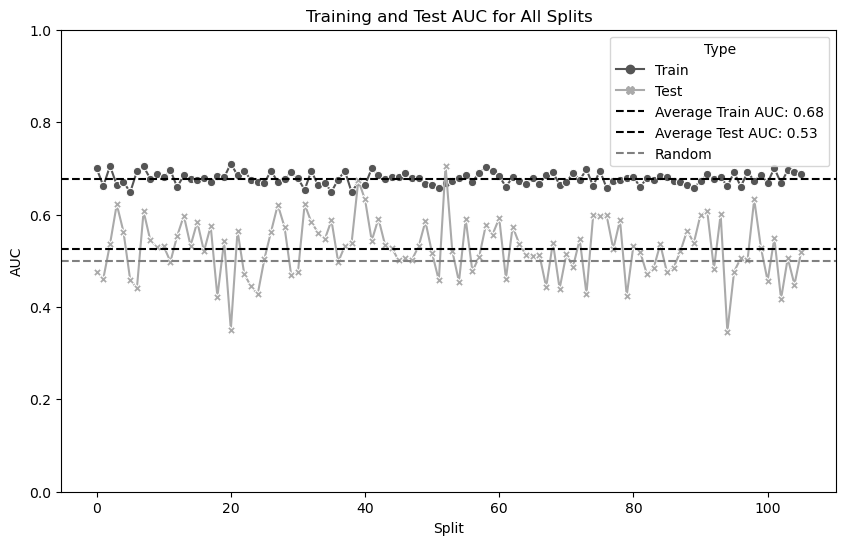

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train_aucs' and 'test_aucs' are lists of AUC scores
splits = np.arange(len(train_aucs))  # Assuming splits are sequential and equal to the length of AUC lists

# Prepare a DataFrame for Seaborn
data = pd.DataFrame({
    'Split': np.concatenate([splits, splits]),  # Double the splits for train and test
    'AUC': np.concatenate([train_aucs, test_aucs]),  # Combine AUC scores
    'Type': ['Train']*len(train_aucs) + ['Test']*len(test_aucs)  # Label types
})

# Calculate the average values for training and test AUCs
avg_train_auc = sum(train_aucs) / len(train_aucs)
avg_test_auc = sum(test_aucs) / len(test_aucs)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Set the color palette to black and white
palette = sns.color_palette("gray", n_colors=2)

# Draw a line plot with Seaborn
sns.lineplot(data=data, x='Split', y='AUC', hue='Type', style='Type', markers=True, dashes=False, palette=palette)

# Add average lines for Train and Test AUCs
plt.axhline(y=avg_train_auc, color='black', linestyle='--', label=f"Average Train AUC: {avg_train_auc:.2f}")
plt.axhline(y=avg_test_auc, color='black', linestyle='--', label=f"Average Test AUC: {avg_test_auc:.2f}")

# Line for random chance performance
plt.axhline(y=0.5, color='gray', linestyle='--', label="Random")

# Customize the axes and title
plt.xlabel('Split')
plt.ylabel('AUC')
plt.title('Training and Test AUC for All Splits')

# Show the legend and customize it to not show the color guide
plt.legend(title='Type')

# Set the ylim to standardize the AUC view
plt.ylim([0, 1])

# Display the plot
plt.show()


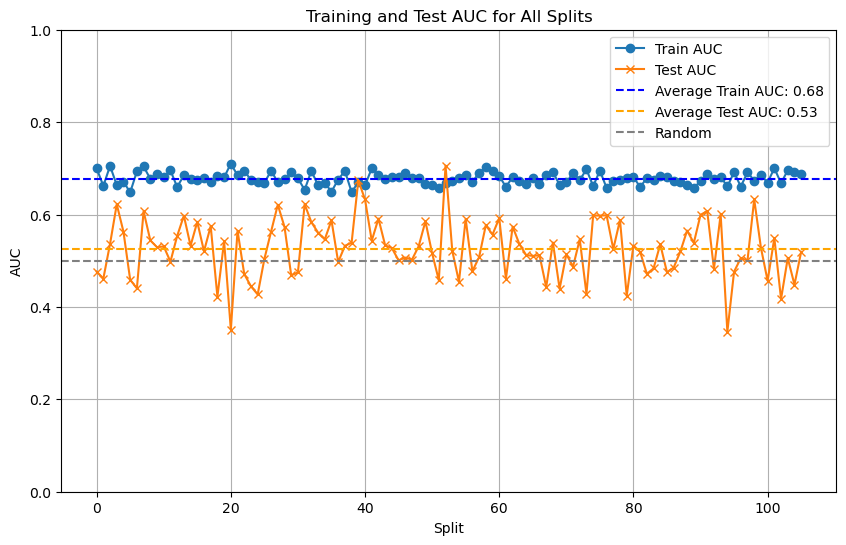

In [15]:
import matplotlib.pyplot as plt

# Calculate the average values for training and test AUCs
avg_train_auc = sum(train_aucs) / len(train_aucs)
avg_test_auc = sum(test_aucs) / len(test_aucs)

plt.figure(figsize=(10, 6))
plt.plot(train_aucs, label="Train AUC", marker='o')
plt.plot(test_aucs, label="Test AUC", marker='x')

# Add average lines for Train and Test AUCs
plt.axhline(y=avg_train_auc, color='blue', linestyle='--', label=f"Average Train AUC: {avg_train_auc:.2f}")
plt.axhline(y=avg_test_auc, color='orange', linestyle='--', label=f"Average Test AUC: {avg_test_auc:.2f}")

# Line for random
plt.axhline(y=0.5, color='gray', linestyle='--', label="Random")

plt.xlabel('Split')
plt.ylabel('AUC')
plt.title('Training and Test AUC for All Splits')
plt.legend()
plt.grid(True)
plt.ylim([0, 1])
plt.show()
